# ***Let me check your Diabetese***

![image.png](https://res.cloudinary.com/grohealth/image/upload/c_fill,f_auto,fl_lossy,h_650,q_auto,w_1085/v1581695681/DCUK/Content/causes-of-diabetes.png)

Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy.

## Data Description

**Context**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Acknowledgements**

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

### **Importing Required libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


#### **Load the Datasets**

In [2]:
df=pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### **Shape of Datasets**

In [3]:
print("Shape of datasets:",df.shape)

Shape of datasets: (768, 9)


### **Checking Null Value**

In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### **correlation**

In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. In the broadest sense correlation is any statistical association, though it commonly refers to the degree to which a pair of variables are linearly related.

In [5]:
corr=df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### **correlation using Heatmap**

***Heatmap***

A heat map is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space.

<AxesSubplot:>

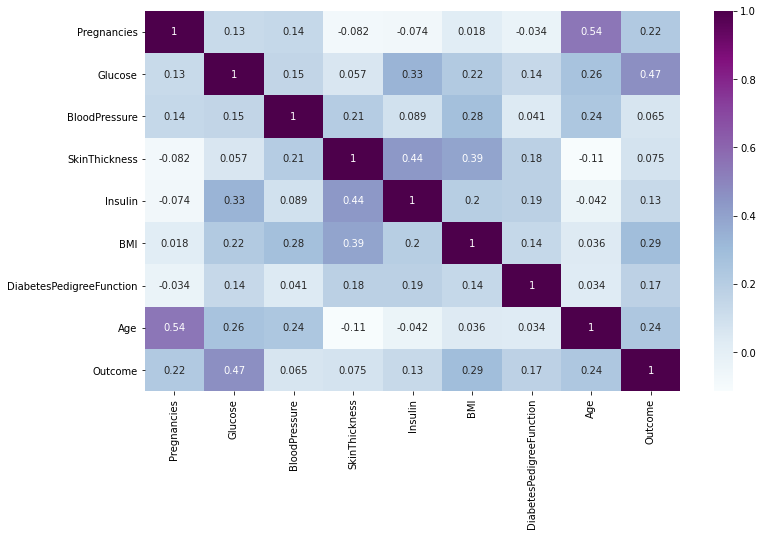

In [6]:
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True,cmap='BuPu')

Now let’s look at how much each attribute correlates with the **Outcome**

In [7]:
corr['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1,When the coefficient is close to –1, it means that there is a strong negative correlation. coefficients close to zero mean that there is no
linear correlation.

![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


look at the columns ('Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI') minimum value. which is zero. 

Can minimum value of above listed columns be zero ?

No. this value doesn't make any sense



In [9]:
col=['Glucose' ,'BloodPressure' ,'SkinThickness', 'Insulin' ,'BMI']

In [10]:
for i in col:
    df[i].replace(0,df[i].mean(),inplace=True)

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# ***Exploratory Data Analysis***

![image.png](https://devopedia.org/images/article/75/4833.1523705164.jpg)

**Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. ... It can also help determine if the statistical techniques you are considering for data analysis are appropriate.**



### **Let's Explore Independent variable**

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

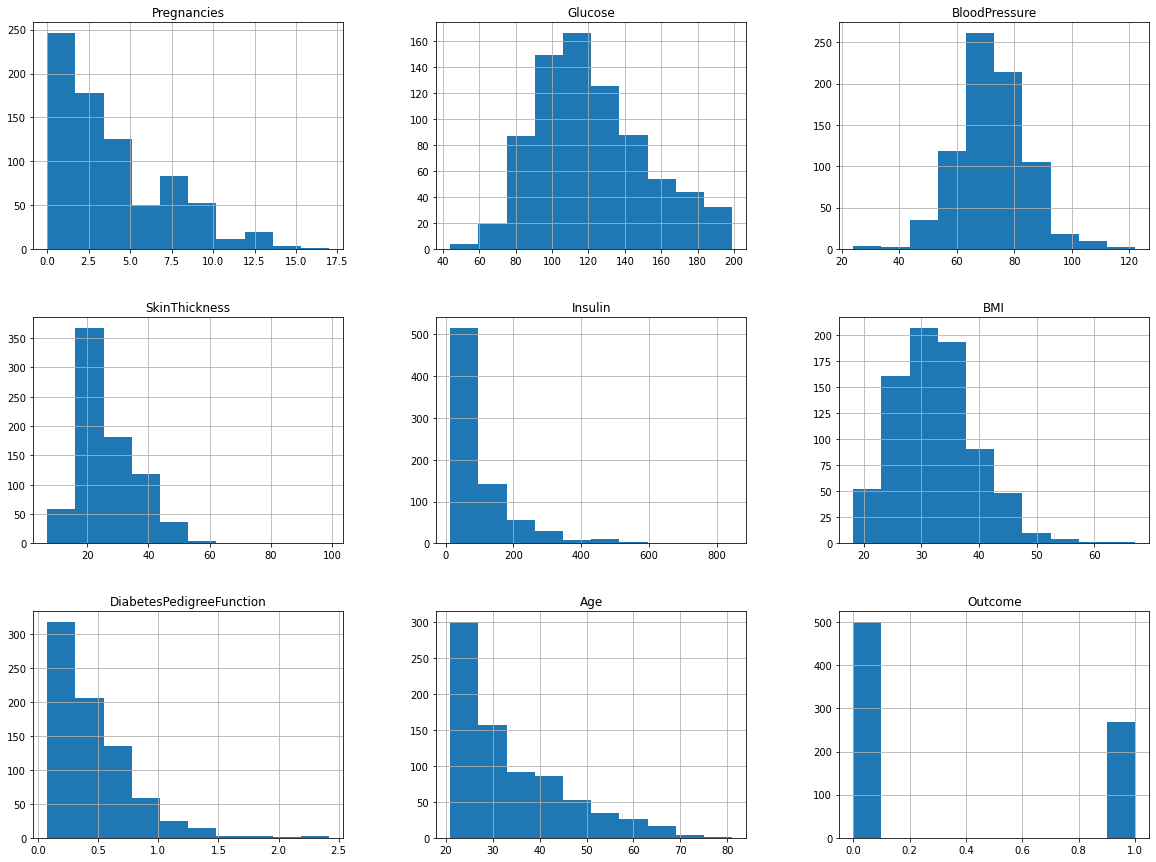

In [12]:
df.hist(figsize=(20,15))

A histogram is a chart that shows frequencies for. intervals of values of a metric variable. Such intervals as known as “bins” and they all have the same widths.

Above histograme clearly show the data is widely dispersed. so firstly we check the varience of each columns

In [13]:
df.var()

Pregnancies                   11.354056
Glucose                      926.351048
BloodPressure                146.795798
SkinThickness                 92.760798
Insulin                     8663.952981
BMI                           47.270761
DiabetesPedigreeFunction       0.109779
Age                          138.303046
Outcome                        0.227483
dtype: float64

Then we use **StandardScaler**

StandardScaler is useful for the features that follow a Normal distribution.

StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

In [14]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X =  pd.DataFrame(ss.fit_transform(df.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

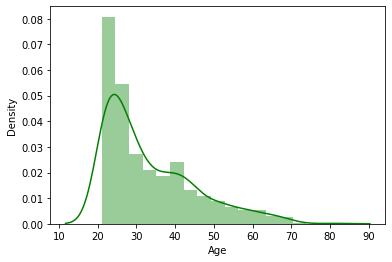

In [15]:
sns.distplot(df['Age'],color='green')

<AxesSubplot:xlabel='Age', ylabel='count'>

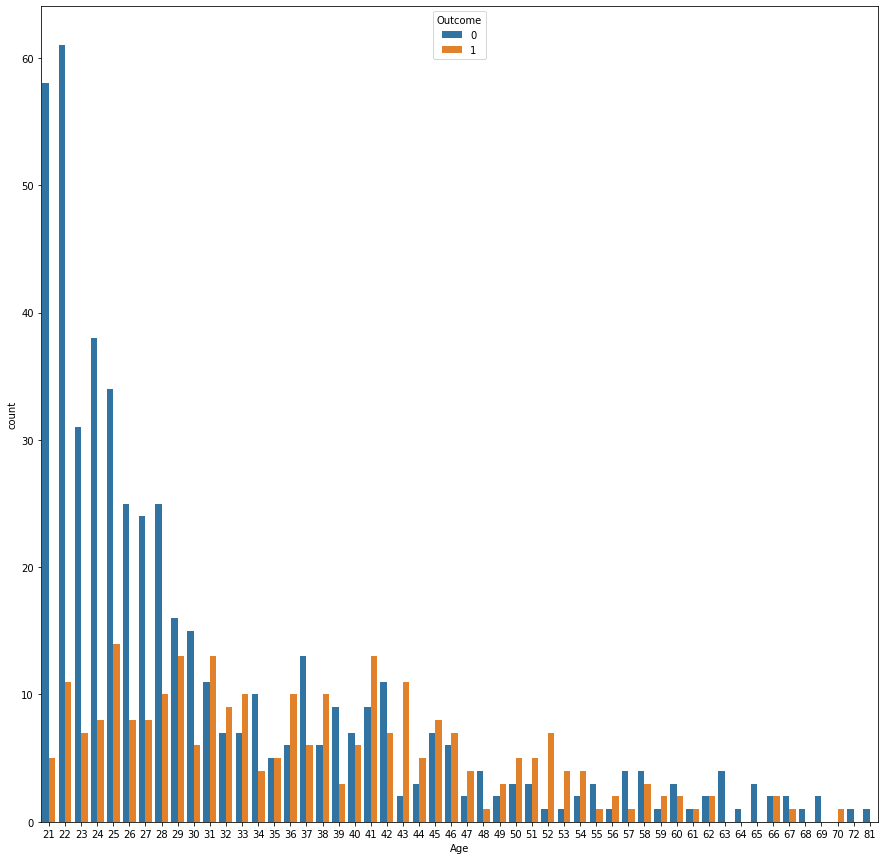

In [16]:
plt.figure(figsize=(15,15))
sns.countplot(x='Age',data=df,hue='Outcome')

***Boxplot***

n descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram.

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

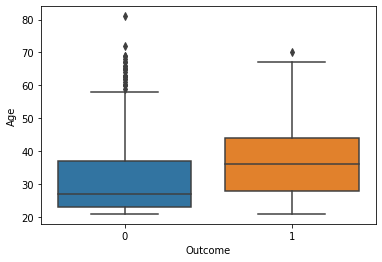

In [17]:
sns.boxplot(x='Outcome',y='Age',data=df)

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

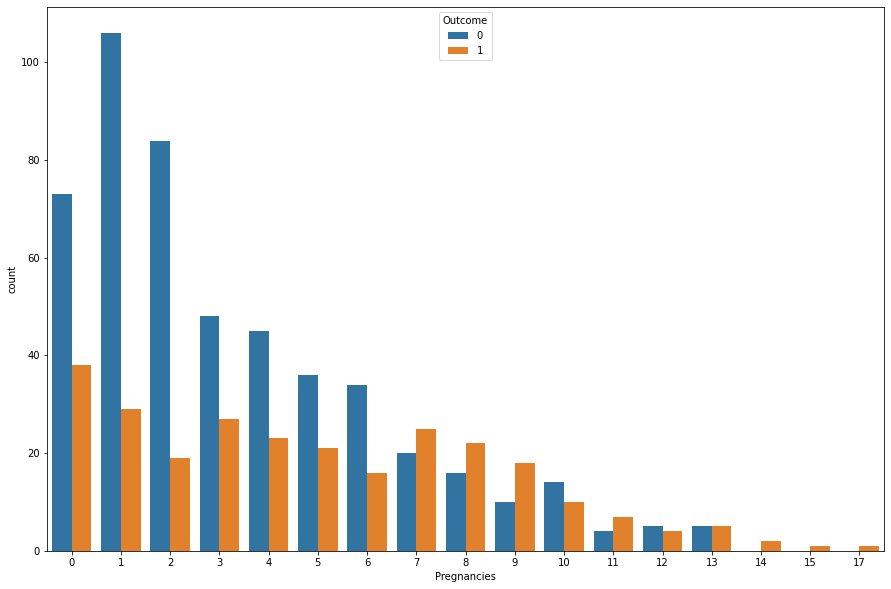

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(x='Pregnancies',hue='Outcome',data=df)

***Pairplot***

pairplot() : To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

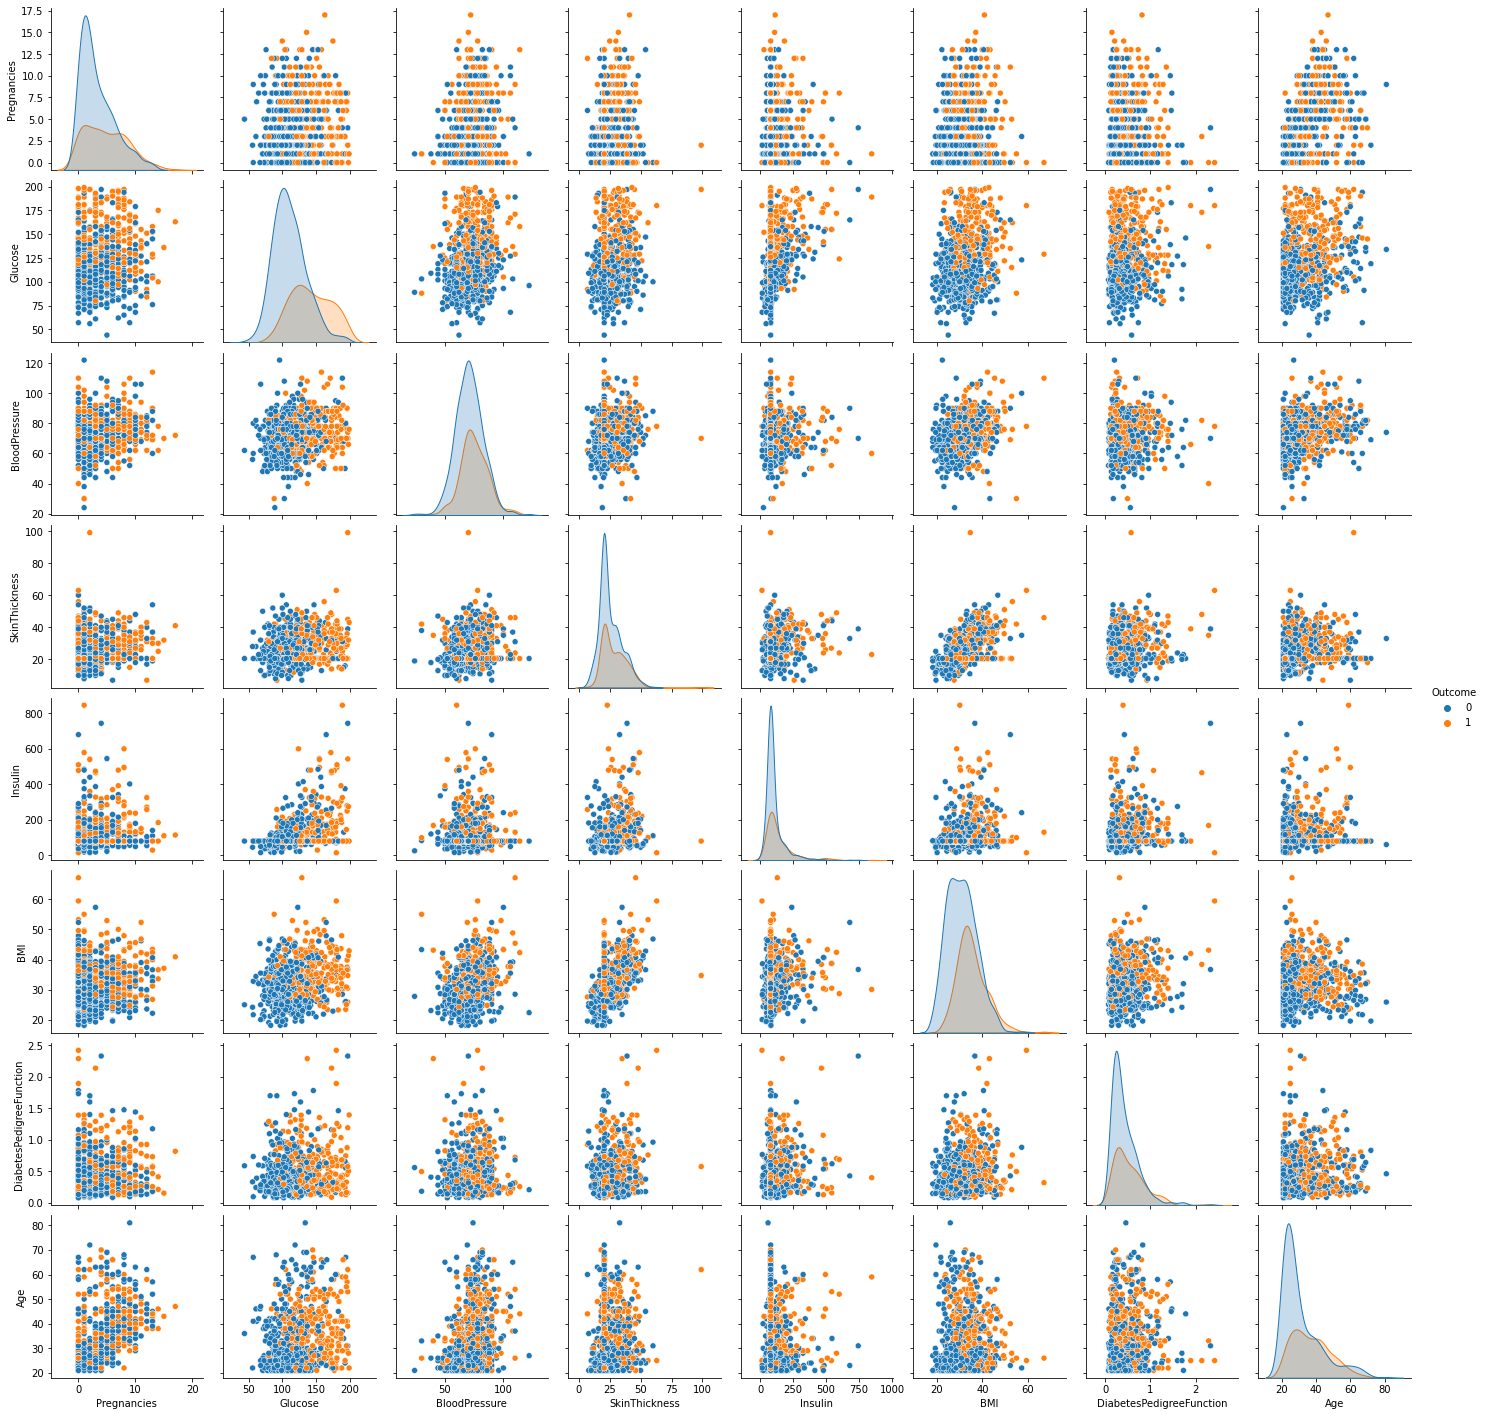

In [19]:
sns.pairplot(df,hue='Outcome')

In [20]:
X=X
y=df['Outcome']

# ***Models***

![image.png](https://miro.medium.com/max/1920/1*saKqNtSnrKdVVEC772ewzw.png)

***Split the Data Set***

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=.3,random_state=3)

## **Logistic regression**

the logistic model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc.

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [22]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=1,penalty='l2')
LR.fit(X_train,Y_train)

from sklearn.metrics import accuracy_score,confusion_matrix

print("Train Set Accuracy:"+str(accuracy_score(Y_train,LR.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,LR.predict(X_test))*100))

Train Set Accuracy:78.77094972067039
Test Set Accuracy:74.45887445887446


## **Random Forest Classifier**

Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [23]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
RF.fit(X_train,Y_train)

print("Train Set Accuracy:"+str(accuracy_score(Y_train,RF.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,RF.predict(X_test))*100))

Train Set Accuracy:86.59217877094973
Test Set Accuracy:73.59307359307358


## **KNearestNeighbors**

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,Y_train)

print("Train Set Accuracy:"+str(accuracy_score(Y_train,knn.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,knn.predict(X_test))*100))

Train Set Accuracy:82.12290502793296
Test Set Accuracy:71.42857142857143


## **Support vector machine**

In machine learning, support-vector machines are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.

A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they're able to categorize new text.

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

**The advantages of support vector machines are:**

1. Effective in high dimensional spaces.

2. Still effective in cases where number of dimensions is greater than the number of samples.

3. Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

4. Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

**The disadvantages of support vector machines include:**

1. If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

2. SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

In [32]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,Y_train)

print("Train Set Accuracy:"+str(accuracy_score(Y_train,svm.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,svm.predict(X_test))*100))

Train Set Accuracy:85.1024208566108
Test Set Accuracy:74.02597402597402


## **DecisionTreeClassifier**

A decision tree is a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails) , each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class labels. The paths from root to leaf represent classification rules.

class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)

In [33]:
from sklearn.tree import DecisionTreeClassifier
DTC= DecisionTreeClassifier(criterion='entropy',max_depth=5)
DTC.fit(X_train,Y_train)

print("Train Set Accuracy:"+str(accuracy_score(Y_train,DTC.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,DTC.predict(X_test))*100))

Train Set Accuracy:83.42644320297951
Test Set Accuracy:71.86147186147186


## **GradientBoostingClassifier**

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.

class sklearn.ensemble.GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
GD=GradientBoostingClassifier()
GD.fit(X_train,Y_train)

print("Train Set Accuracy:"+str(accuracy_score(Y_train,GD.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,GD.predict(X_test))*100))

Train Set Accuracy:94.22718808193669
Test Set Accuracy:73.59307359307358


## **XGBClassifier**

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.


In [35]:
from xgboost import XGBClassifier
XGB=XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth=6,n_estimators = 10)
XGB.fit(X_train,Y_train)

print("Train Set Accuracy:"+str(accuracy_score(Y_train,XGB.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,XGB.predict(X_test))*100))

[12:03:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Set Accuracy:90.5027932960894
Test Set Accuracy:73.16017316017316


## ***Thank you so much for Reading this Notebook***
**Please review and kindly comments the issue**

**all type of review are welcomed**

![image.png](https://static.vecteezy.com/system/resources/thumbnails/000/412/892/small_2x/964.jpg)